### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

In [3]:
while input() != 'q':
    print(np.random.randint(37), end='')


20
21
16
7
24
17q


### 2. 
**1)** Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

Проверим, что для противоположных событий p(A) + p(B) = 1.  
Подбросим монетку n раз (пусть 1 - орел и 0 - решка) и посчитаем сколько раз выпал орел (k раз). После этого посчитаем вероятности выпадения орла и решки (p1 и p2 соответственно) как количество выпадений орла (k) и решки (n-k) на этой дистанции к общему количетву испытаний (n). Согласно теореме сумма этих вероятностей должна равняться 1.

**Прим.:** метод count для подсчета количества вхождений элемента в массив не работает с типом numpy.ndarray, возвращаемым np.random.randint. Поэтому преобразуем numpy.ndarray в list

In [4]:
n = 1000
k = list(np.random.randint(0, 2, n)).count(1)
p1 = k / n
p2 = (n - k) / n
print(p1, p2, p1 + p2)

0.479 0.521 1.0


**2)** Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [5]:
import matplotlib.pyplot as plt

**Прим.:** sorted() для наглядности (на результат не влияет)

In [6]:
x = sorted([round(np.random.rand(10).sum(), 2) for i in range(10)])
x

[4.53, 4.93, 5.03, 5.13, 5.13, 5.4, 5.56, 5.62, 6.27, 6.92]

Text(0, 0.5, 'count')

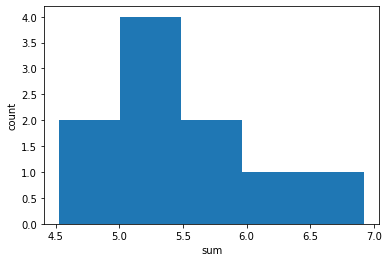

In [7]:
bins = 5
plt.hist(sorted(x), bins)
plt.xlabel('sum')
plt.ylabel('count')

### 3.  
**1)** Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

Сколько получается по коду из видео:

In [8]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(n):
    if x[i] == 2:
        k = k + 1
print(k / n)

0.3683


Сколько должно быть (раcчет по формулам):

In [9]:
def prob(k, n):
    C = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))
    return C / pow(2, n)

In [10]:
prob(2, 4)

0.375

**2)** Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [11]:
prob(3, 4)

0.25

In [12]:
prob(3, 10)

0.1171875

### 4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [13]:
import itertools

In [14]:
print(len(list(itertools.permutations('012', 3))))
print('---')
for i in itertools.permutations('012', 3):
    print(''.join(i))

6
---
012
021
102
120
201
210


In [15]:
print(len(list(itertools.permutations('01235', 4))))
print('---')
for i in itertools.permutations('01235', 4):
    print(''.join(i))

120
---
0123
0125
0132
0135
0152
0153
0213
0215
0231
0235
0251
0253
0312
0315
0321
0325
0351
0352
0512
0513
0521
0523
0531
0532
1023
1025
1032
1035
1052
1053
1203
1205
1230
1235
1250
1253
1302
1305
1320
1325
1350
1352
1502
1503
1520
1523
1530
1532
2013
2015
2031
2035
2051
2053
2103
2105
2130
2135
2150
2153
2301
2305
2310
2315
2350
2351
2501
2503
2510
2513
2530
2531
3012
3015
3021
3025
3051
3052
3102
3105
3120
3125
3150
3152
3201
3205
3210
3215
3250
3251
3501
3502
3510
3512
3520
3521
5012
5013
5021
5023
5031
5032
5102
5103
5120
5123
5130
5132
5201
5203
5210
5213
5230
5231
5301
5302
5310
5312
5320
5321


### 5. Дополните код расчетом коэффициента корреляции x и y по формуле

0.6354786853155925 0.18074246479880007
0.6354786853155912 0.18074246479880068


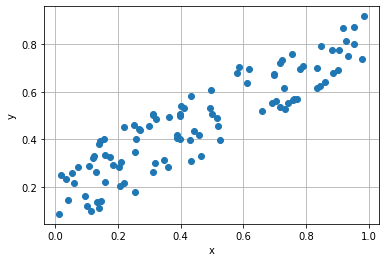

In [16]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r * x + (1 - r) * np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
a = (np.sum(x) * np.sum(y) - n * np.sum(x * y)) / (np.sum(x) * np.sum(x) - n * np.sum(x * x))
b = (np.sum(y) - a * np.sum(x)) / n
A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)

In [17]:
c = np.sum((x - np.mean(x)) * (y - np.mean(y))) /\
                            np.sqrt(np.sum(np.square(x - np.mean(x))) * np.sum(np.square(y - np.mean(y))))
c1 = np.corrcoef(x, y)
print(c, c1[0][1])

0.9019066837863597 0.9019066837863595
